In [3]:
import os
import json
import csv
import pandas as pd
import os.path
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
from unidecode import unidecode
from datetime import datetime, timedelta
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np

# ENTREGA 2

## 11

Considere:

b. No caso de modelo classificatório

i. apresentar o gráfico de balanceamento dos dados da variável que corresponde à classe.

ii. Apresentar a quantidade de amostras para cada classe.



In [5]:
path = os.getcwd()
path_xlsx = path + '/'

print(path_xlsx)
data = pd.read_excel(f"{path_xlsx}/dataframe_final.xlsx")
df = data.dropna(subset=['label'])
df = df.drop('label2', axis=1)

c:\Users\Dell\Desktop\git\classification-ti26s/


In [7]:
df['label']

0       1
1       1
2       0
3       0
4       0
       ..
3038    1
3039    0
3040    0
3041    0
3042    0
Name: label, Length: 3043, dtype: int64

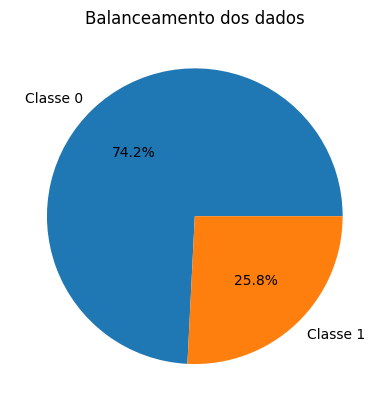

In [12]:
# Contagem dos valores únicos na lista 'classe'
valores, contagem = np.unique(df['label'], return_counts=True)

# Criação do gráfico
labels = ['Classe 0', 'Classe 1']
plt.pie(contagem, labels=labels, autopct='%1.1f%%')
plt.title('Balanceamento dos dados')
plt.show()



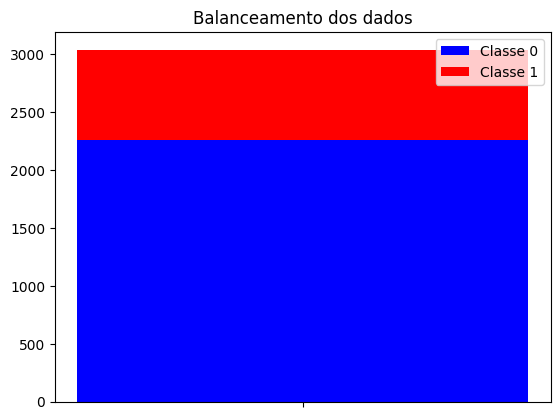

In [14]:
# Contagem dos valores únicos na lista 'classe'
valores, contagem = np.unique(df['label'], return_counts=True)

# Criação do gráfico
barlist = plt.bar([''], contagem[0], color='b')
plt.bar([''], contagem[1], color='r', bottom=contagem[0])
plt.legend(barlist, labels)
plt.legend(('Classe 0', 'Classe 1'))
plt.title('Balanceamento dos dados')
plt.show()



## 12


Transforme os atributos categóricos em numéricos.

Já estava numérico.

- 0 --> sem preconceito
- 1 --> com preconceito

## 13

Faça dois modelos de split da base de dados, ou seja, dois experimentos:
- a. Split 1: Utilizando divisão de 70% para treinamento e 30% para teste
- b. Split 2: Utilizando validação cruzada com k igual a 10.

A divisão da base e a definição do k = 10 para a validação cruzada são feitas no próprio algoritmo de classificação (SVM).

In [15]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
kf = KFold(n_splits=10)

## 14

Defina dois algoritmos de aprendizagem de máquina. Realize o treinamento e teste
para cada split definido na questão 13. Para tanto:
- a. Para cada algoritmo, apresente pelo menos 2 modificações nos parâmetros.
Exemplo, se escolher o KNN, use diferentes valores de K. Se escolher Random
Forest, use diferentes valores para o parâmetro de profundidade. etc.
Ou seja, você deverá realizar 4 experimentos diferentes para cada split da base.
- Split 1:
  - algoritmo 1, parâmetro 1
  - algoritmo 1, parâmetro 2
  - algoritmo 2, parâmetro 1
  - algoritmo 2, parâmetro 2


- Split 2:
  - algoritmo 1, parâmetro 1
  - algoritmo 1, parâmetro 2
  - algoritmo 2, parâmetro 1
  - algoritmo 2, parâmetro 2


### Split 1

In [ ]:
# Definir listas para armazenar os resultados de cada classe
precision_0_list = []
recall_0_list = []
f1_0_list = []
support_0_list = []

precision_1_list = []
recall_1_list = []
f1_1_list = []
support_1_list = []

accuracy_list = []

# Repetir o processo 100 vezes
for _ in range(100):
    # Dividir os dados em recursos (X) e rótulos (y)
    X = df['text']
    y = df['label']
    
    # Pré-processamento dos textos usando TF-IDF
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(X)
    
    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1)
    
    # Treinamento do modelo SVM
    svm = SVC()
    svm.fit(X_train, y_train)
    
    # Classificação dos textos de teste
    y_pred = svm.predict(X_test)
    
    # Avaliação do modelo e armazenamento dos resultados para cada classe
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0_list.append(report['0.0']['precision'])
    recall_0_list.append(report['0.0']['recall'])
    f1_0_list.append(report['0.0']['f1-score'])
    support_0_list.append(report['0.0']['support'])
    
    precision_1_list.append(report['1.0']['precision'])
    recall_1_list.append(report['1.0']['recall'])
    f1_1_list.append(report['1.0']['f1-score'])
    support_1_list.append(report['1.0']['support'])
    
    accuracy_list.append(report['accuracy'])

# Converter as listas em arrays numpy para facilitar o cálculo dos valores estatísticos
precision_0_array = np.array(precision_0_list)
recall_0_array = np.array(recall_0_list)
f1_0_array = np.array(f1_0_list)
support_0_array = np.array(support_0_list)

precision_1_array = np.array(precision_1_list)
recall_1_array = np.array(recall_1_list)
f1_1_array = np.array(f1_1_list)
support_1_array = np.array(support_1_list)

accuracy_array = np.array(accuracy_list)

# Calcular os valores mínimo, máximo e média de cada métrica para cada classe
precision_0_min = precision_0_array.min()
precision_0_max = precision_0_array.max()
precision_0_mean = precision_0_array.mean()

recall_0_min = recall_0_array.min()
recall_0_max = recall_0_array.max()
recall_0_mean = recall_0_array.mean()

f1_0_min = f1_0_array.min()
f1_0_max = f1_0_array.max()
f1_0_mean = f1_0_array.mean()

support_0_min = support_0_array.min()
support_0_max = support_0_array.max()
support_0_mean = support_0_array.mean()

precision_1_min = precision_1_array.min()
precision_1_max = precision_1_array.max()
precision_1_mean = precision_1_array.mean()

recall_1_min = recall_1_array.min()
recall_1_max = recall_1_array.max()
recall_1_mean = recall_1_array.mean()

f1_1_min = f1_1_array.min()
f1_1_max = f1_1_array.max()
f1_1_mean = f1_1_array.mean()

support_1_min = support_1_array.min()
support_1_max = support_1_array.max()
support_1_mean = support_1_array.mean()

accuracy_min = accuracy_array.min()
accuracy_max = accuracy_array.max()
accuracy_mean = accuracy_array.mean()

# Imprimir os resultados
print("Classe 0:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_0_min, precision_0_max, precision_0_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_0_min, recall_0_max, recall_0_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_0_min, f1_0_max, f1_0_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_0_min, support_0_max, support_0_mean))

print("\nClasse 1:")
print("Precision - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(precision_1_min, precision_1_max, precision_1_mean))
print("Recall - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(recall_1_min, recall_1_max, recall_1_mean))
print("F1-Score - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(f1_1_min, f1_1_max, f1_1_mean))
print("Support - Min: {}, Max: {}, Mean: {:.2f}".format(support_1_min, support_1_max, support_1_mean))

print("\nAccuracy - Min: {:.4f}, Max: {:.4f}, Mean: {:.4f}".format(accuracy_min, accuracy_max, accuracy_mean))

